In [1]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

# Load dataset
df = pd.read_csv("data_full.csv")

# Display basic info
print(df.info())  # Check for missing values and data types
print(df.describe())  # Get statistical overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   num     100 non-null    int64  
 1   msttr   100 non-null    float64
 2   ari     100 non-null    float64
 3   fg      100 non-null    float64
 4   fe      100 non-null    float64
 5   words   100 non-null    int64  
 6   comm    100 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 5.6 KB
None
             num       msttr        ari          fg          fe        words  \
count  100.00000  100.000000  100.00000  100.000000  100.000000   100.000000   
mean   113.70000    0.714698    8.03200    6.134000   80.668400  4632.290000   
std      8.16311    0.011098    2.03638    1.726983    5.454446  2740.397255   
min    100.00000    0.700303    5.40000    3.700000   63.770000   356.000000   
25%    107.00000    0.706522    6.50000    4.975000   78.485000  2268.000000   
50%    113.00000    0.712020 

In [2]:
# Display the first 5 rows of the dataframe
df.head()

,num,msttr,ari,fg,fe,words,comm
0,102,0.705500,6.2,3.7,86.50,1494,10
1,107,0.701875,6.2,4.8,83.76,3469,8
2,106,0.710899,9.2,7.3,77.16,7559,21
3,107,0.710899,9.2,7.3,77.16,7559,21
4,124,0.701765,9.8,6.7,78.89,1465,0


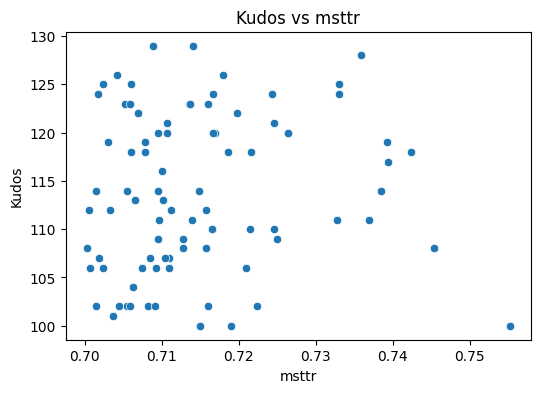

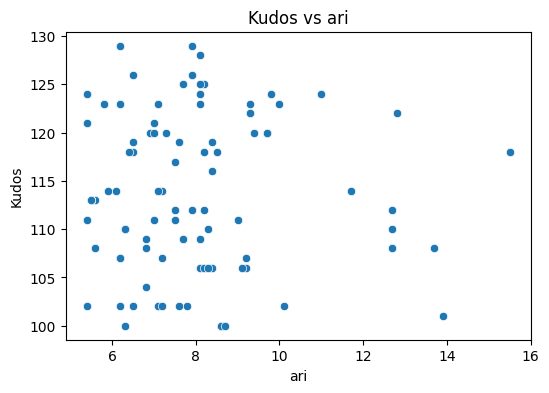

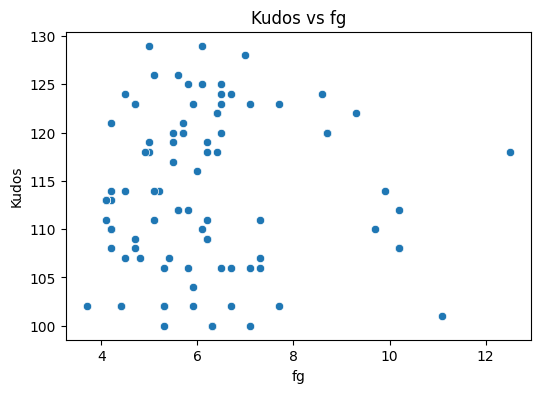

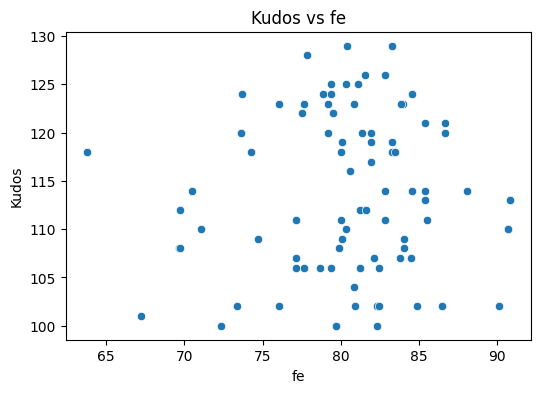

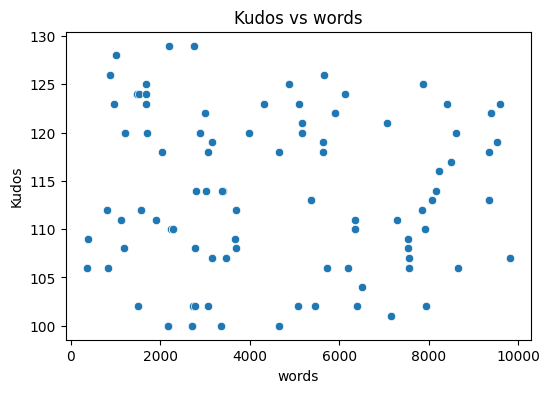

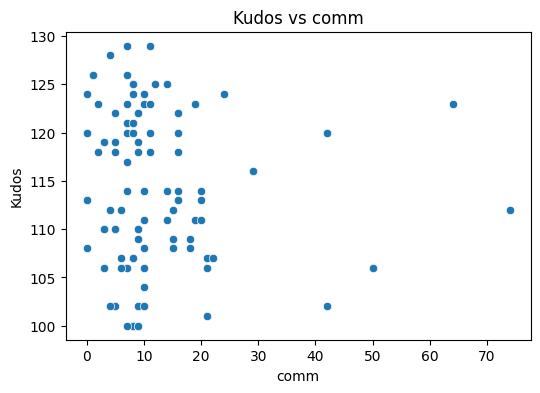

In [3]:
# Make a list of independent variables - Automated Readability Index (ARI), Flesch Grade (FG), Flesch Ease (FE), mean segmental type-token ratio (MSTTR), word count (words), and comment count(comm)
independent_vars = ["msttr", "ari", "fg", "fe", "words", "comm"]
dependent_var = "num" # Assign the dependent variable

# Create scatterplots to visually inspect the relationships between the dependent and independent variables
for var in independent_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[var], y=df["num"])
    plt.xlabel(var)
    plt.ylabel("Kudos")
    plt.title(f"Kudos vs {var}")
    plt.show()

Performing regression for msttr
Intercept: 71.2720, Slope: 59.3649, R2 Score: 0.0065


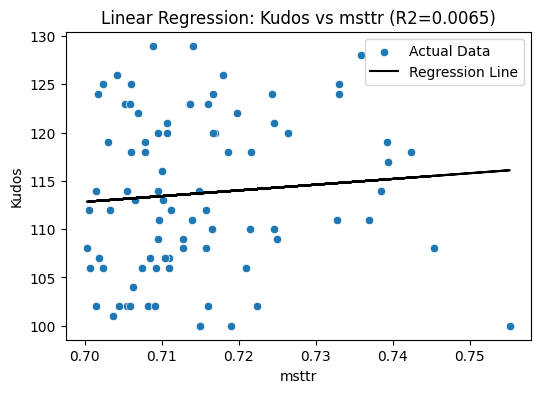

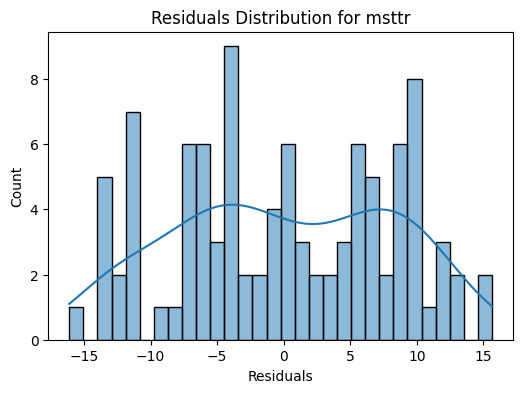

Shapiro-Wilk test p-value for msttr: 0.0081


Performing regression for ari
Intercept: 113.0160, Slope: 0.0852, R2 Score: 0.0005


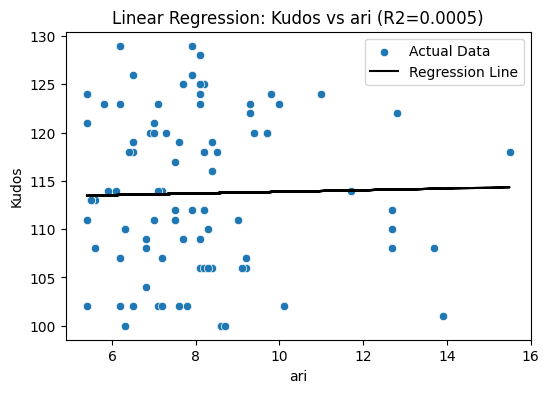

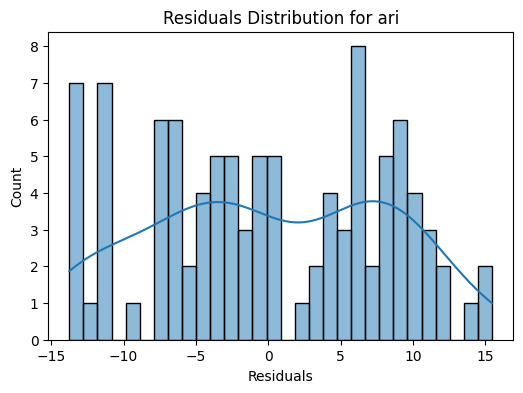

Shapiro-Wilk test p-value for ari: 0.0022


Performing regression for fg
Intercept: 112.1934, Slope: 0.2456, R2 Score: 0.0027


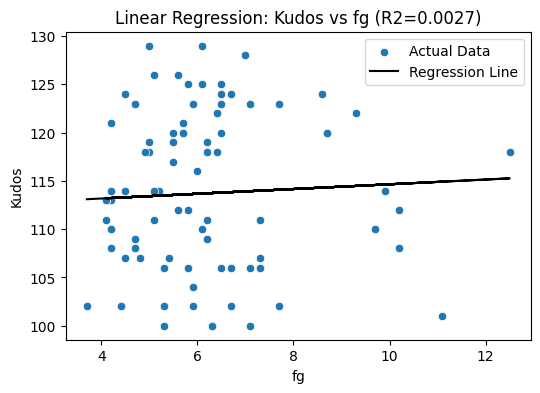

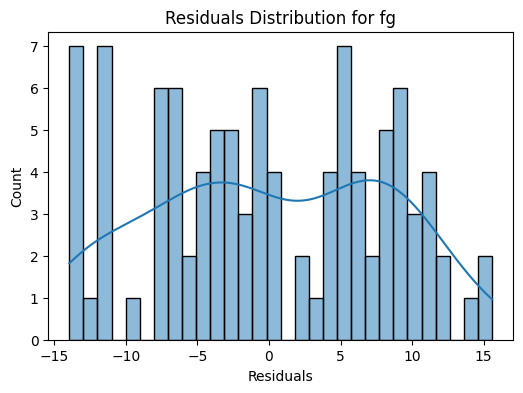

Shapiro-Wilk test p-value for fg: 0.0035


Performing regression for fe
Intercept: 115.1165, Slope: -0.0176, R2 Score: 0.0001


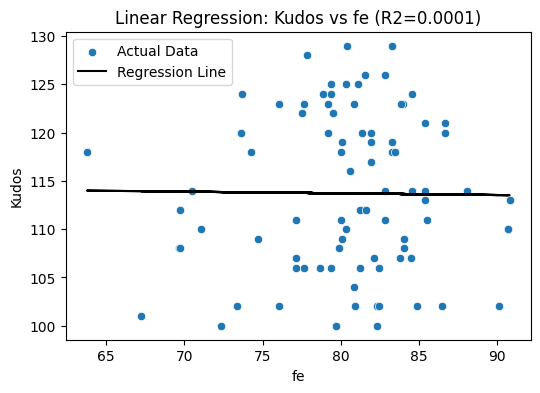

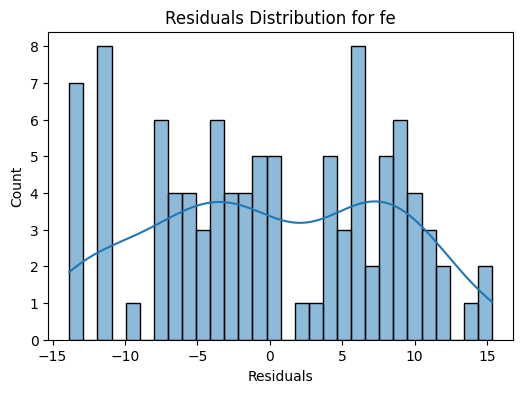

Shapiro-Wilk test p-value for fe: 0.0019


Performing regression for words
Intercept: 113.7431, Slope: -0.0000, R2 Score: 0.0000


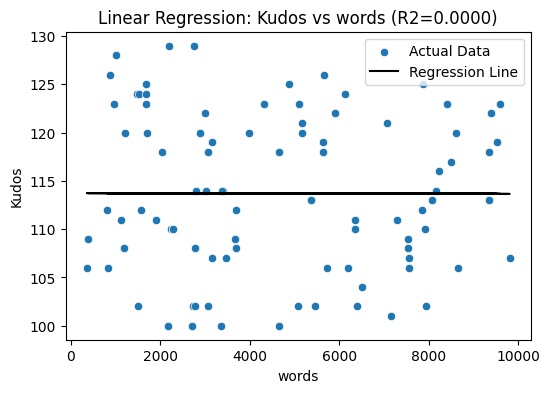

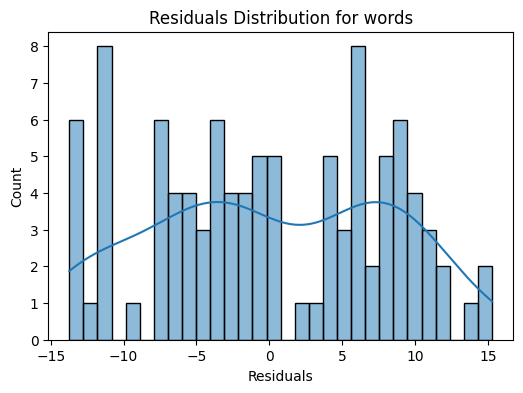

Shapiro-Wilk test p-value for words: 0.0015


Performing regression for comm
Intercept: 113.8604, Slope: -0.0129, R2 Score: 0.0004


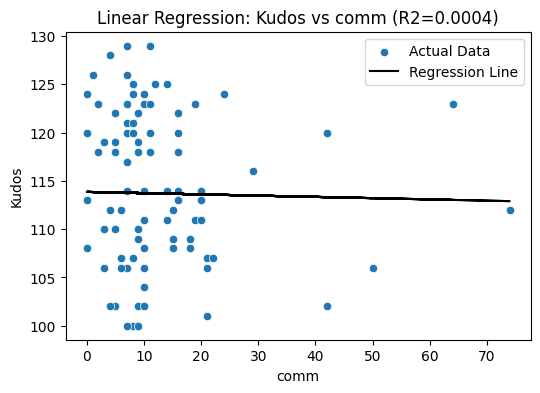

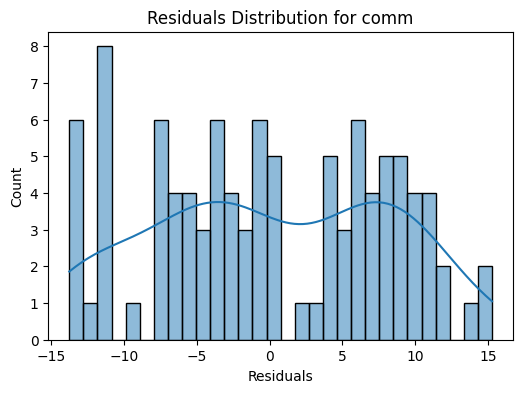

Shapiro-Wilk test p-value for comm: 0.0017




In [4]:
# Perform linear regression on each independent variable in order to see if any of them is a good predictor for the success of a story in the dataset
for var in independent_vars:
    print(f"Performing regression for {var}")

    # Reshaping X as it needs to be a 2D array in order for linear regression with sklearn to be performed
    X = df[var].values.reshape(-1, 1)
    y = df[dependent_var]

    # Train model
    model = LinearRegression()
    model.fit(X, y)

    # Get intercept and slope
    intercept = model.intercept_
    slope = model.coef_[0]

    # Generate predictions
    y_pred = model.predict(X)

    # Calculate R2 Score
    r2 = r2_score(y, y_pred)


    print(f"Intercept: {intercept:.4f}, Slope: {slope:.4f}, R2 Score: {r2:.4f}") # Print the results of the operations above

    # Generate regression line
    regression_line = intercept + slope * df[var]

    # Plot regression line
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[var], y=df[dependent_var], label="Actual Data")
    plt.plot(df[var], regression_line, color='black', label="Regression Line")
    plt.xlabel(var)
    plt.ylabel("Kudos")
    plt.title(f"Linear Regression: Kudos vs {var} (R2={r2:.4f})")
    plt.legend()
    plt.show()

    # Calculate and plot residuals
    residuals = y - y_pred
    
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f"Residuals Distribution for {var}")
    plt.xlabel("Residuals")
    plt.show()

    # Perform Shapiro-Wilk test to check if the residuals are normally distributed
    shapiro_test = stats.shapiro(residuals)
    print(f"Shapiro-Wilk test p-value for {var}: {shapiro_test.pvalue:.4f}")
    print('\n') 